In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
file_path = 'Dataset.csv'

In [48]:
data = pd.read_csv(file_path, delimiter=';')

In [49]:
data.head()

,Column1,Column2
0,Text,Label
1,The impact of educational reforms remains unce...,positive
2,Critics argue that recent improvements in the ...,negative
3,Innovative teaching methods have led to unexpe...,positive
4,"Despite budget constraints, the school has man...",positive


In [50]:
data.shape

(401, 2)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  401 non-null    object
 1   Column2  401 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [52]:
data.Column1.head()

0                                                 Text
1    The impact of educational reforms remains unce...
2    Critics argue that recent improvements in the ...
3    Innovative teaching methods have led to unexpe...
4    Despite budget constraints, the school has man...
Name: Column1, dtype: object

In [53]:
lowercase_data=[]
for i in range (52):
  phrase = (data['Column1'][i]).lower()
  lowercase_data.append(phrase)

In [54]:
lowercase_data[:2]

['text',
 'the impact of educational reforms remains uncertain despite extensive research.']

In [55]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siyak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
tokenized_data=[]
for phrase in lowercase_data:
  li=word_tokenize(phrase)
  tokenized_data.append(li)

In [57]:
tokenized_data[:2]

[['text'],
 ['the',
  'impact',
  'of',
  'educational',
  'reforms',
  'remains',
  'uncertain',
  'despite',
  'extensive',
  'research',
  '.']]

In [58]:
no_punctuation_data=[]
import re
for li in tokenized_data:
  clean=[]
  for w in li:
    res=re.sub(r'[^\w\s]',"",w)
    if res!="":
      clean.append(res)
  no_punctuation_data.append(li)

In [59]:
no_punctuation_data[:3]

[['text'],
 ['the',
  'impact',
  'of',
  'educational',
  'reforms',
  'remains',
  'uncertain',
  'despite',
  'extensive',
  'research',
  '.'],
 ['critics',
  'argue',
  'that',
  'recent',
  'improvements',
  'in',
  'the',
  'school',
  'system',
  'are',
  'merely',
  'superficial',
  '.']]

In [60]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siyak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
no_stopwords_data=[]
for phrase in no_punctuation_data:
    clean=[]
    for i in phrase: 
      if not i in stopwords.words("english"):
        clean.append(i)
    no_stopwords_data.append(phrase)

In [62]:
no_stopwords_data[:2]

[['text'],
 ['the',
  'impact',
  'of',
  'educational',
  'reforms',
  'remains',
  'uncertain',
  'despite',
  'extensive',
  'research',
  '.']]

In [63]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

stem_data=[]
for li in no_punctuation_data:
  clean=[]
  for word in li:
    w=stemmer.stem(word)
    clean.append(w)
  stem_data.append(clean)

In [64]:
stem_data[:2]

[['text'],
 ['the',
  'impact',
  'of',
  'educ',
  'reform',
  'remain',
  'uncertain',
  'despit',
  'extens',
  'research',
  '.']]

In [65]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download("wordnet")
lem = WordNetLemmatizer()

lemmatized_data=[]
for li in stem_data:
  clean=[]
  for words in li:
    w=lem.lemmatize(words)
    clean.append(w)
  lemmatized_data.append(clean)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siyak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
lemmatized_data[:4]

[['text'],
 ['the',
  'impact',
  'of',
  'educ',
  'reform',
  'remain',
  'uncertain',
  'despit',
  'extens',
  'research',
  '.'],
 ['critic',
  'argu',
  'that',
  'recent',
  'improv',
  'in',
  'the',
  'school',
  'system',
  'are',
  'mere',
  'superfici',
  '.'],
 ['innov',
  'teach',
  'method',
  'have',
  'led',
  'to',
  'unexpect',
  'challeng',
  'for',
  'both',
  'student',
  'and',
  'teacher',
  '.']]

In [67]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [68]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Column1'])
y = data['Column2']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [103]:
y_pred = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9876543209876543
Precision: 0.9925925925925926
Recall: 0.6666666666666666
F1 Score: 0.6629213483146067


Accuracy: 0.9876543209876543
              precision    recall  f1-score   support

      Class1       0.00      0.00      0.00         1
      Class2       1.00      1.00      1.00        36
      Class3       0.98      1.00      0.99        44

    accuracy                           0.99        81
   macro avg       0.66      0.67      0.66        81
weighted avg       0.98      0.99      0.98        81



C:\Users\siyak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siyak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\siyak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


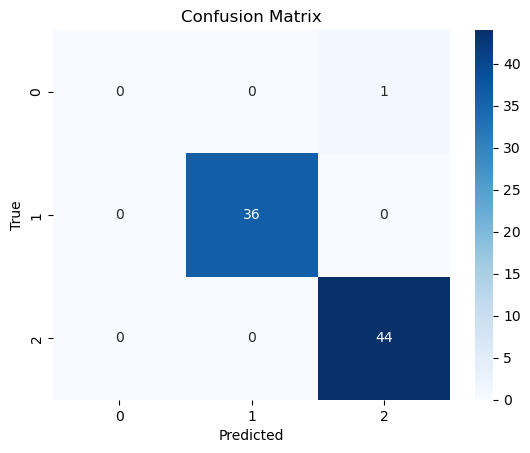

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred, target_names=['Class1', 'Class2', 'Class3']))  # Adjust class names as necessary

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
